In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [3]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [4]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
df.nunique().sort_values(ascending= True)

Research               2
University Rating      5
SOP                    9
LOR                    9
TOEFL Score           29
GRE Score             49
Chance of Admit       61
CGPA                 184
Serial No.           500
dtype: int64

In [7]:
df1 = df.drop("Serial No.",axis=1)

In [8]:
df1.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [10]:
df1.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [12]:
df1.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [13]:
df1.dtypes.value_counts()

int64      4
float64    4
Name: count, dtype: int64

Count the integer datatype column

In [14]:
int_col = df1.select_dtypes(include=["int64"]).columns.tolist()
int_col

['GRE Score', 'TOEFL Score', 'University Rating', 'Research']

Count Float datatype column

In [15]:
float_col = df1.select_dtypes(include=["float64"]).columns.tolist()
float_col

['SOP', 'LOR ', 'CGPA', 'Chance of Admit ']

Check the outlier exsist in the int64 columns

<function matplotlib.pyplot.show(close=None, block=None)>

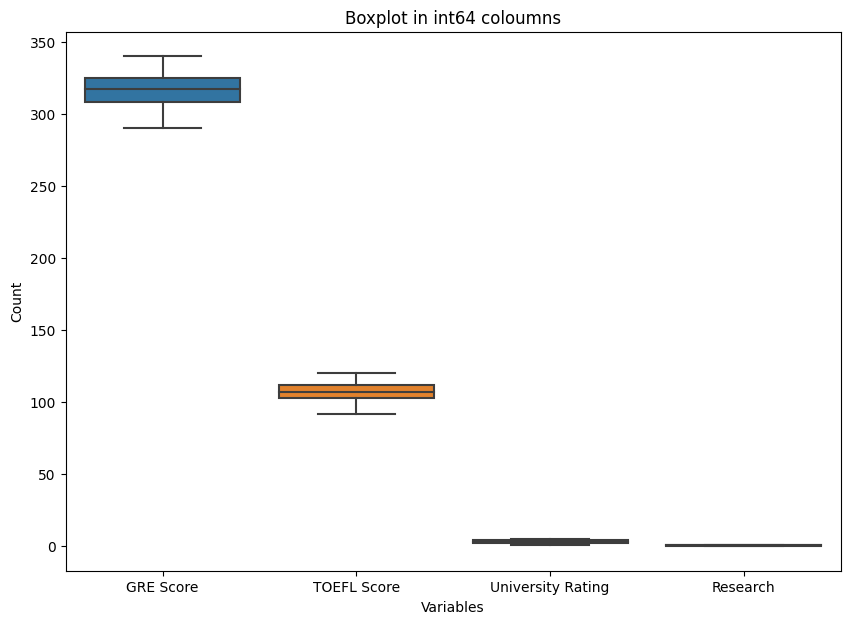

In [16]:
fig = plt.figure(figsize =(10, 7))
plt.title("Boxplot in int64 coloumns")
sns.boxplot(df1[int_col])
plt.xlabel("Variables")
plt.ylabel("Count")
plt.show

###### In int64 datatype columns have no outliers

Check the outlier exsist in the float64 columns


<function matplotlib.pyplot.show(close=None, block=None)>

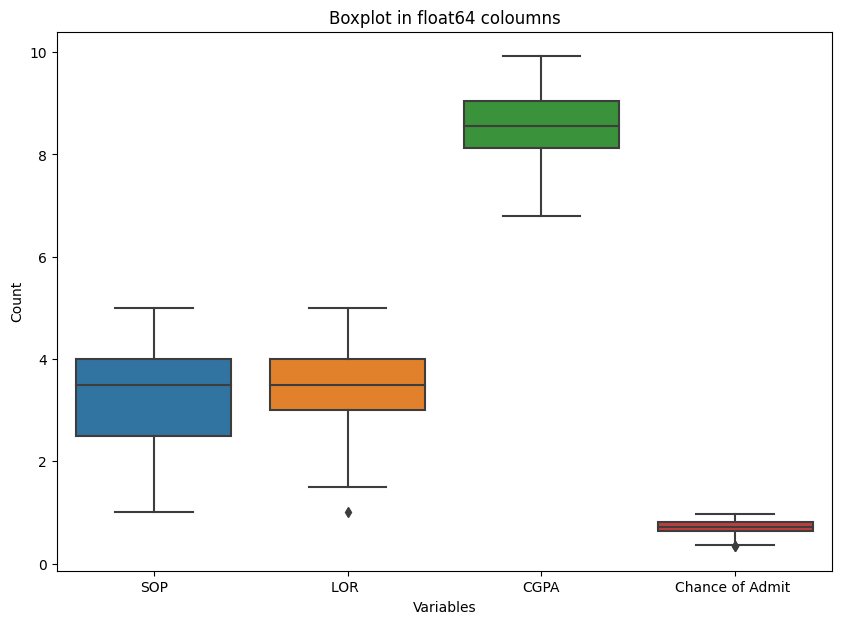

In [17]:
fig = plt.figure(figsize =(10, 7))
plt.title("Boxplot in float64 coloumns")
sns.boxplot(df1[float_col])
plt.xlabel("Variables")
plt.ylabel("Count")
plt.show

###### In this float64 datatype columns "LOR" and "Chance of Admit" have outlier but this oulier can be ignoreable

<function matplotlib.pyplot.show(close=None, block=None)>

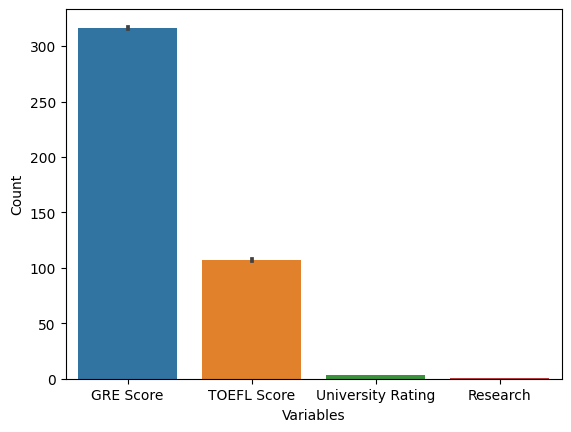

In [18]:
sns.barplot(df[int_col])
plt.xlabel("Variables")
plt.ylabel("Count")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

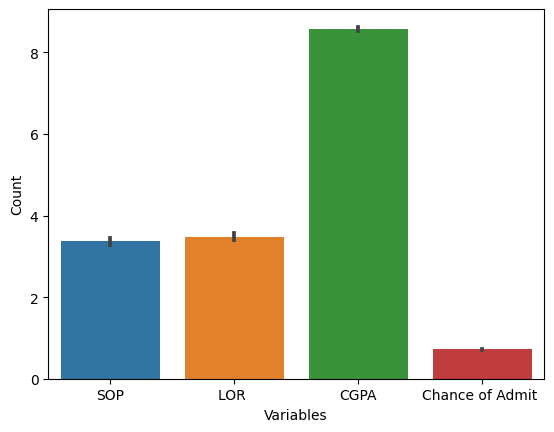

In [19]:
sns.barplot(df[float_col])
plt.xlabel("Variables")
plt.ylabel("Count")
plt.show

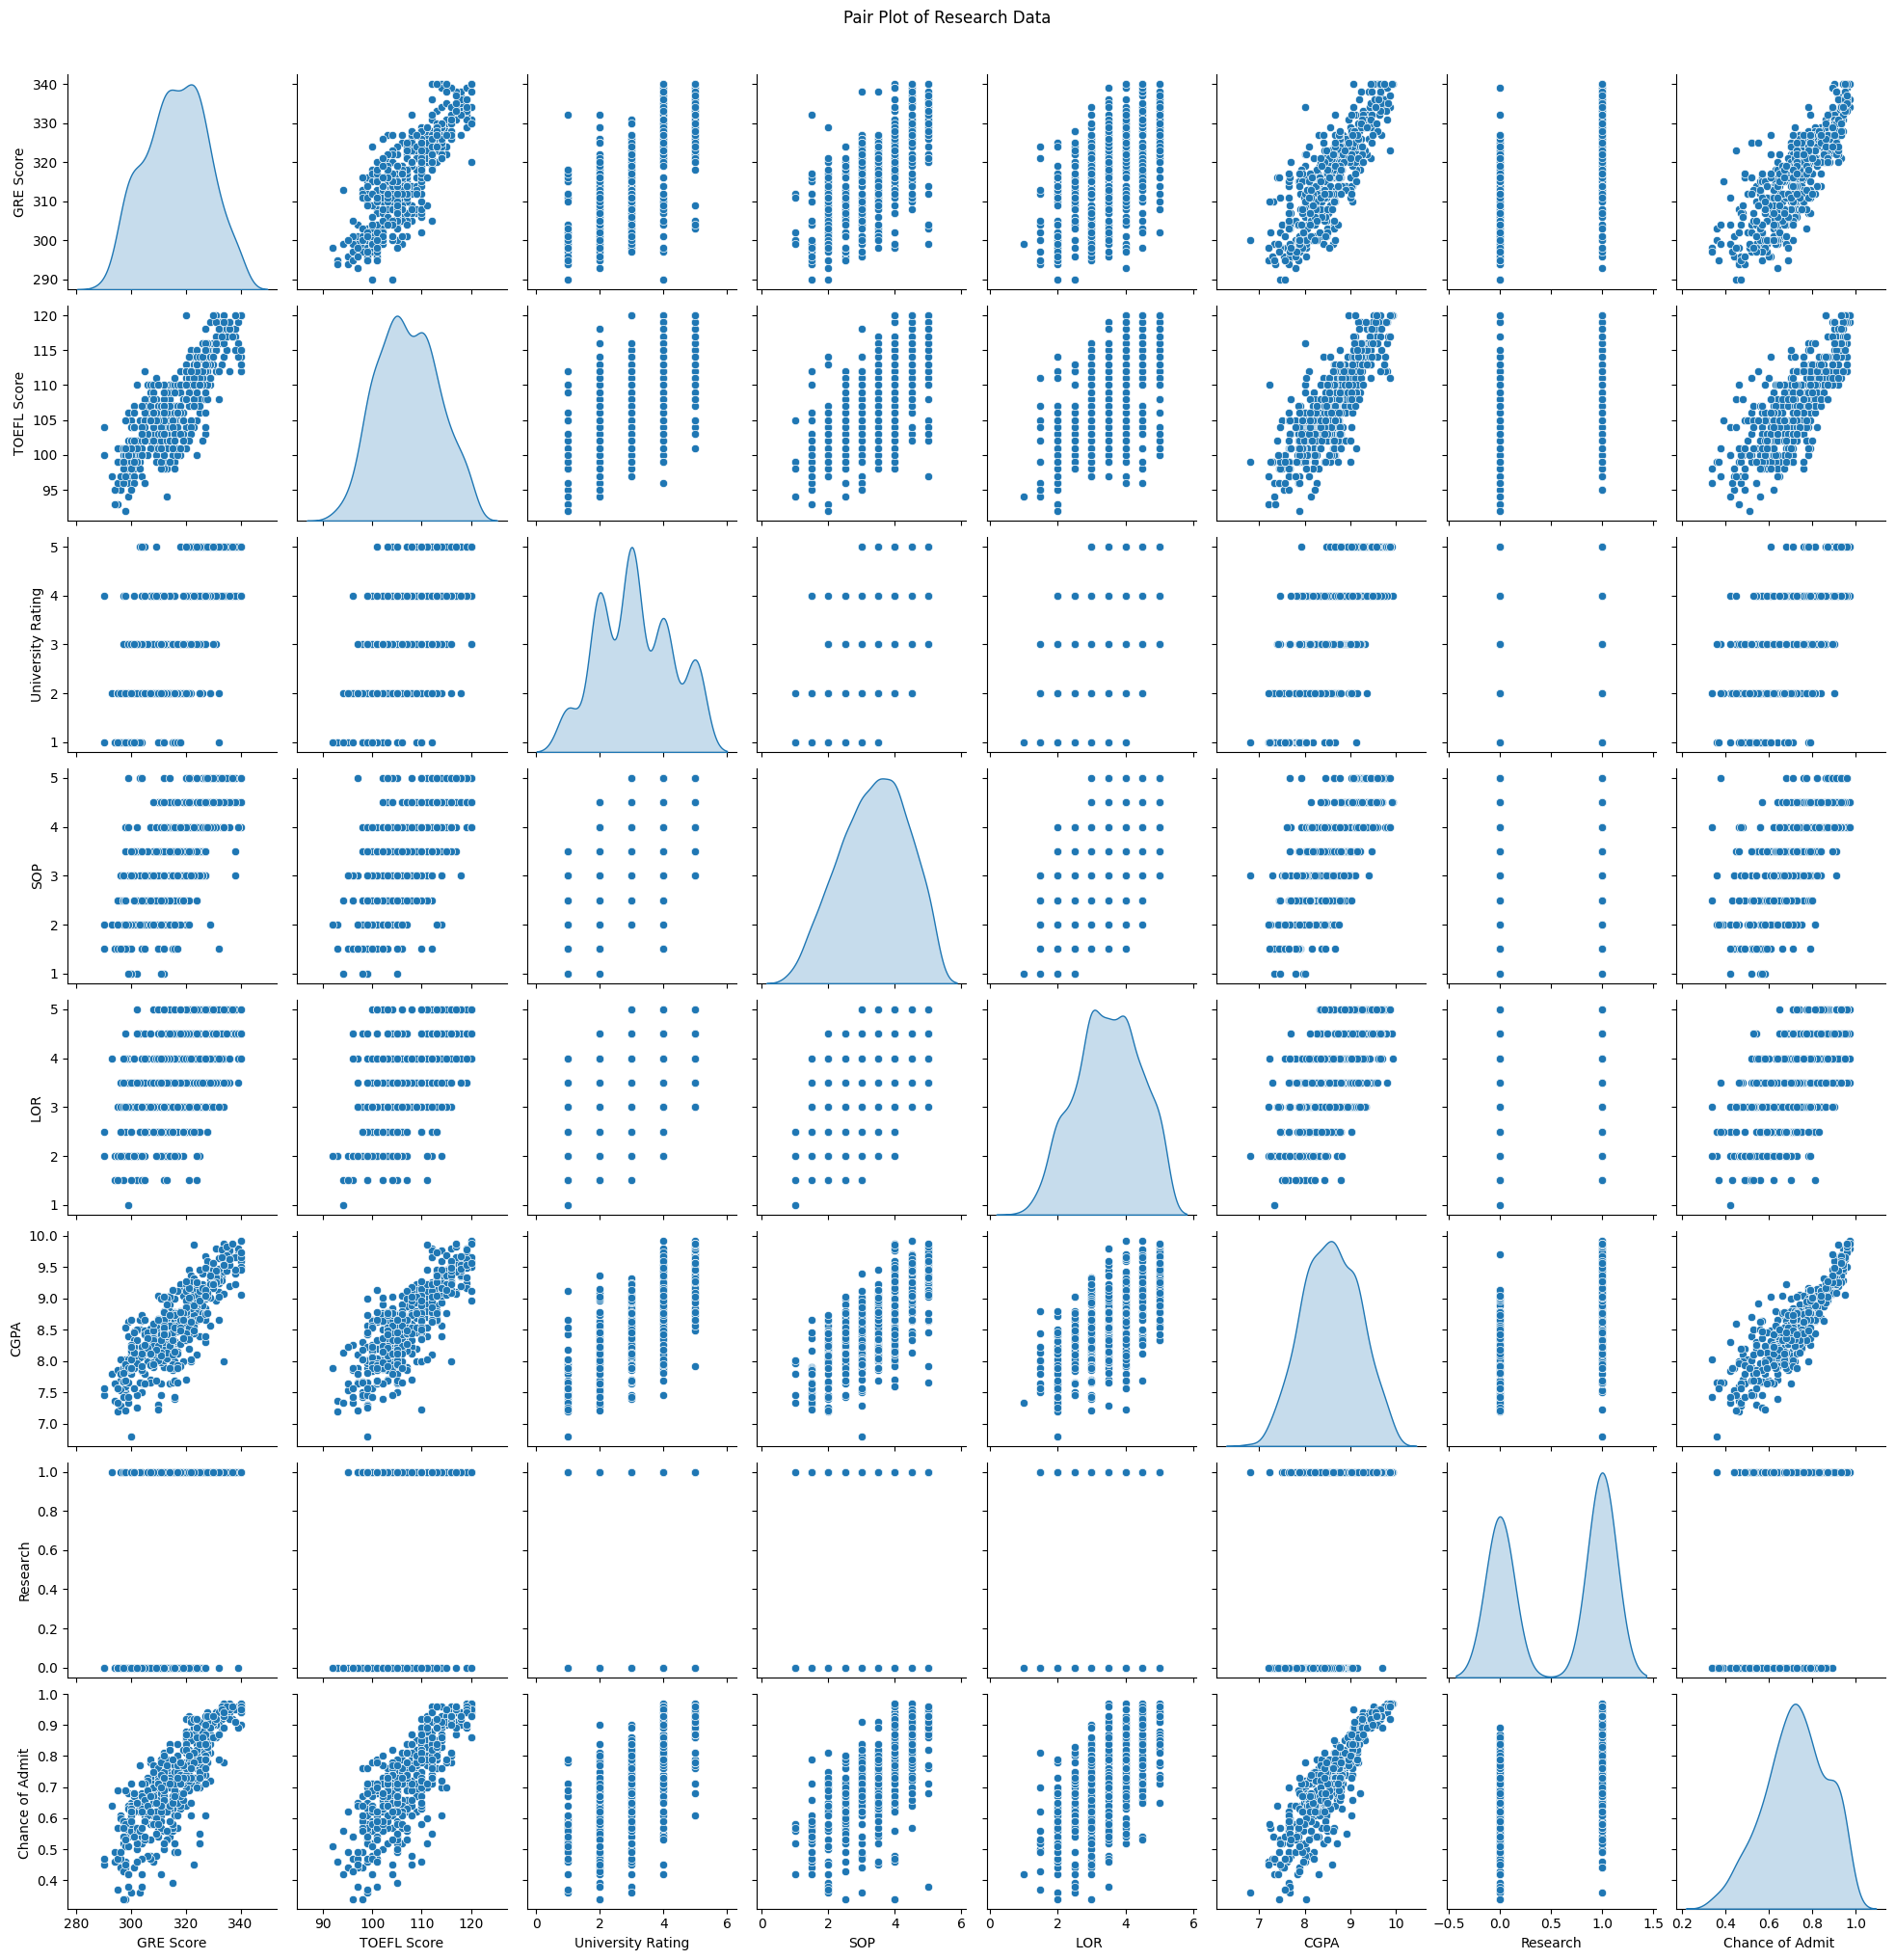

In [20]:
sns.pairplot(df1 , diag_kind="kde")
plt.suptitle("Pair Plot of Research Data", y=1.02)
plt.show()

Train-Test Split

In [21]:
X = df1.drop(["Research"],axis =1)
y = df1["Research"]
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size = 0.3)

In [22]:
df1.shape

(500, 8)

In [23]:
model = SVC(kernel='linear') 
model.fit(X_train,y_train)

SVC(kernel='linear')

In [24]:
pred1 = model.predict(X_test)

In [25]:
acc1 = model.score(X_test,y_test)

In [26]:
acc_svm = round(acc1 * 100, 2)
acc_svm

79.33

In [27]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75        59
           1       0.85      0.80      0.82        91

    accuracy                           0.79       150
   macro avg       0.78      0.79      0.79       150
weighted avg       0.80      0.79      0.79       150



K-Nearest Neighbour is used for this classification problem


In [28]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)

KNeighborsClassifier()

In [29]:
pred2 = model.predict(X_test)

In [30]:
acc2 = model.score(X_test,y_test)

In [31]:
acc_knn = round(acc2 * 100, 2)
acc_knn

81.33

In [32]:
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.73      0.83      0.78        59
           1       0.88      0.80      0.84        91

    accuracy                           0.81       150
   macro avg       0.81      0.82      0.81       150
weighted avg       0.82      0.81      0.81       150



Linear Regression is used for this classification problem


In [33]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [34]:
pred3 = model.predict(X_test)

In [35]:
acc3 = model.score(X_test,y_test)

In [36]:
acc_lir = round(acc3 * 100 , 2)
acc_lir

30.18

Logistic Regression is used for this classification problem

In [37]:
model = linear_model.LogisticRegression()
model.fit(X_train,y_train)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
pred4 = model.predict(X_test)

In [39]:
acc4 = model.score(X_test,y_test)

In [40]:
acc_lr = round(acc4 * 100 , 2)
acc_lr

72.67

In [41]:
print(classification_report(y_test, pred4))

              precision    recall  f1-score   support

           0       0.65      0.66      0.66        59
           1       0.78      0.77      0.77        91

    accuracy                           0.73       150
   macro avg       0.71      0.72      0.71       150
weighted avg       0.73      0.73      0.73       150



Decision Tree is used in this classification problem

In [42]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [43]:
pred5 = model.predict(X_test)

In [44]:
acc5 = model.score(X_train,y_train)

In [45]:
acc_decisionTree = round( acc5 * 100 , 2)
acc_decisionTree

100.0

In [46]:
print(classification_report(y_test, pred5))

              precision    recall  f1-score   support

           0       0.65      0.68      0.66        59
           1       0.78      0.76      0.77        91

    accuracy                           0.73       150
   macro avg       0.71      0.72      0.72       150
weighted avg       0.73      0.73      0.73       150



In [47]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_6 <= 0.73
|   |--- feature_0 <= 309.50
|   |   |--- feature_6 <= 0.67
|   |   |   |--- feature_5 <= 7.00
|   |   |   |   |--- class: 1
|   |   |   |--- feature_5 >  7.00
|   |   |   |   |--- feature_5 <= 8.64
|   |   |   |   |   |--- feature_4 <= 3.25
|   |   |   |   |   |   |--- feature_1 <= 108.50
|   |   |   |   |   |   |   |--- feature_1 <= 95.50
|   |   |   |   |   |   |   |   |--- feature_5 <= 7.45
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_5 >  7.45
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_1 >  95.50
|   |   |   |   |   |   |   |   |--- feature_5 <= 8.19
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_5 >  8.19
|   |   |   |   |   |   |   |   |   |--- feature_6 <= 0.56
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_6 >  0.56
|   |   |   |   |   |   |   |   |   |   

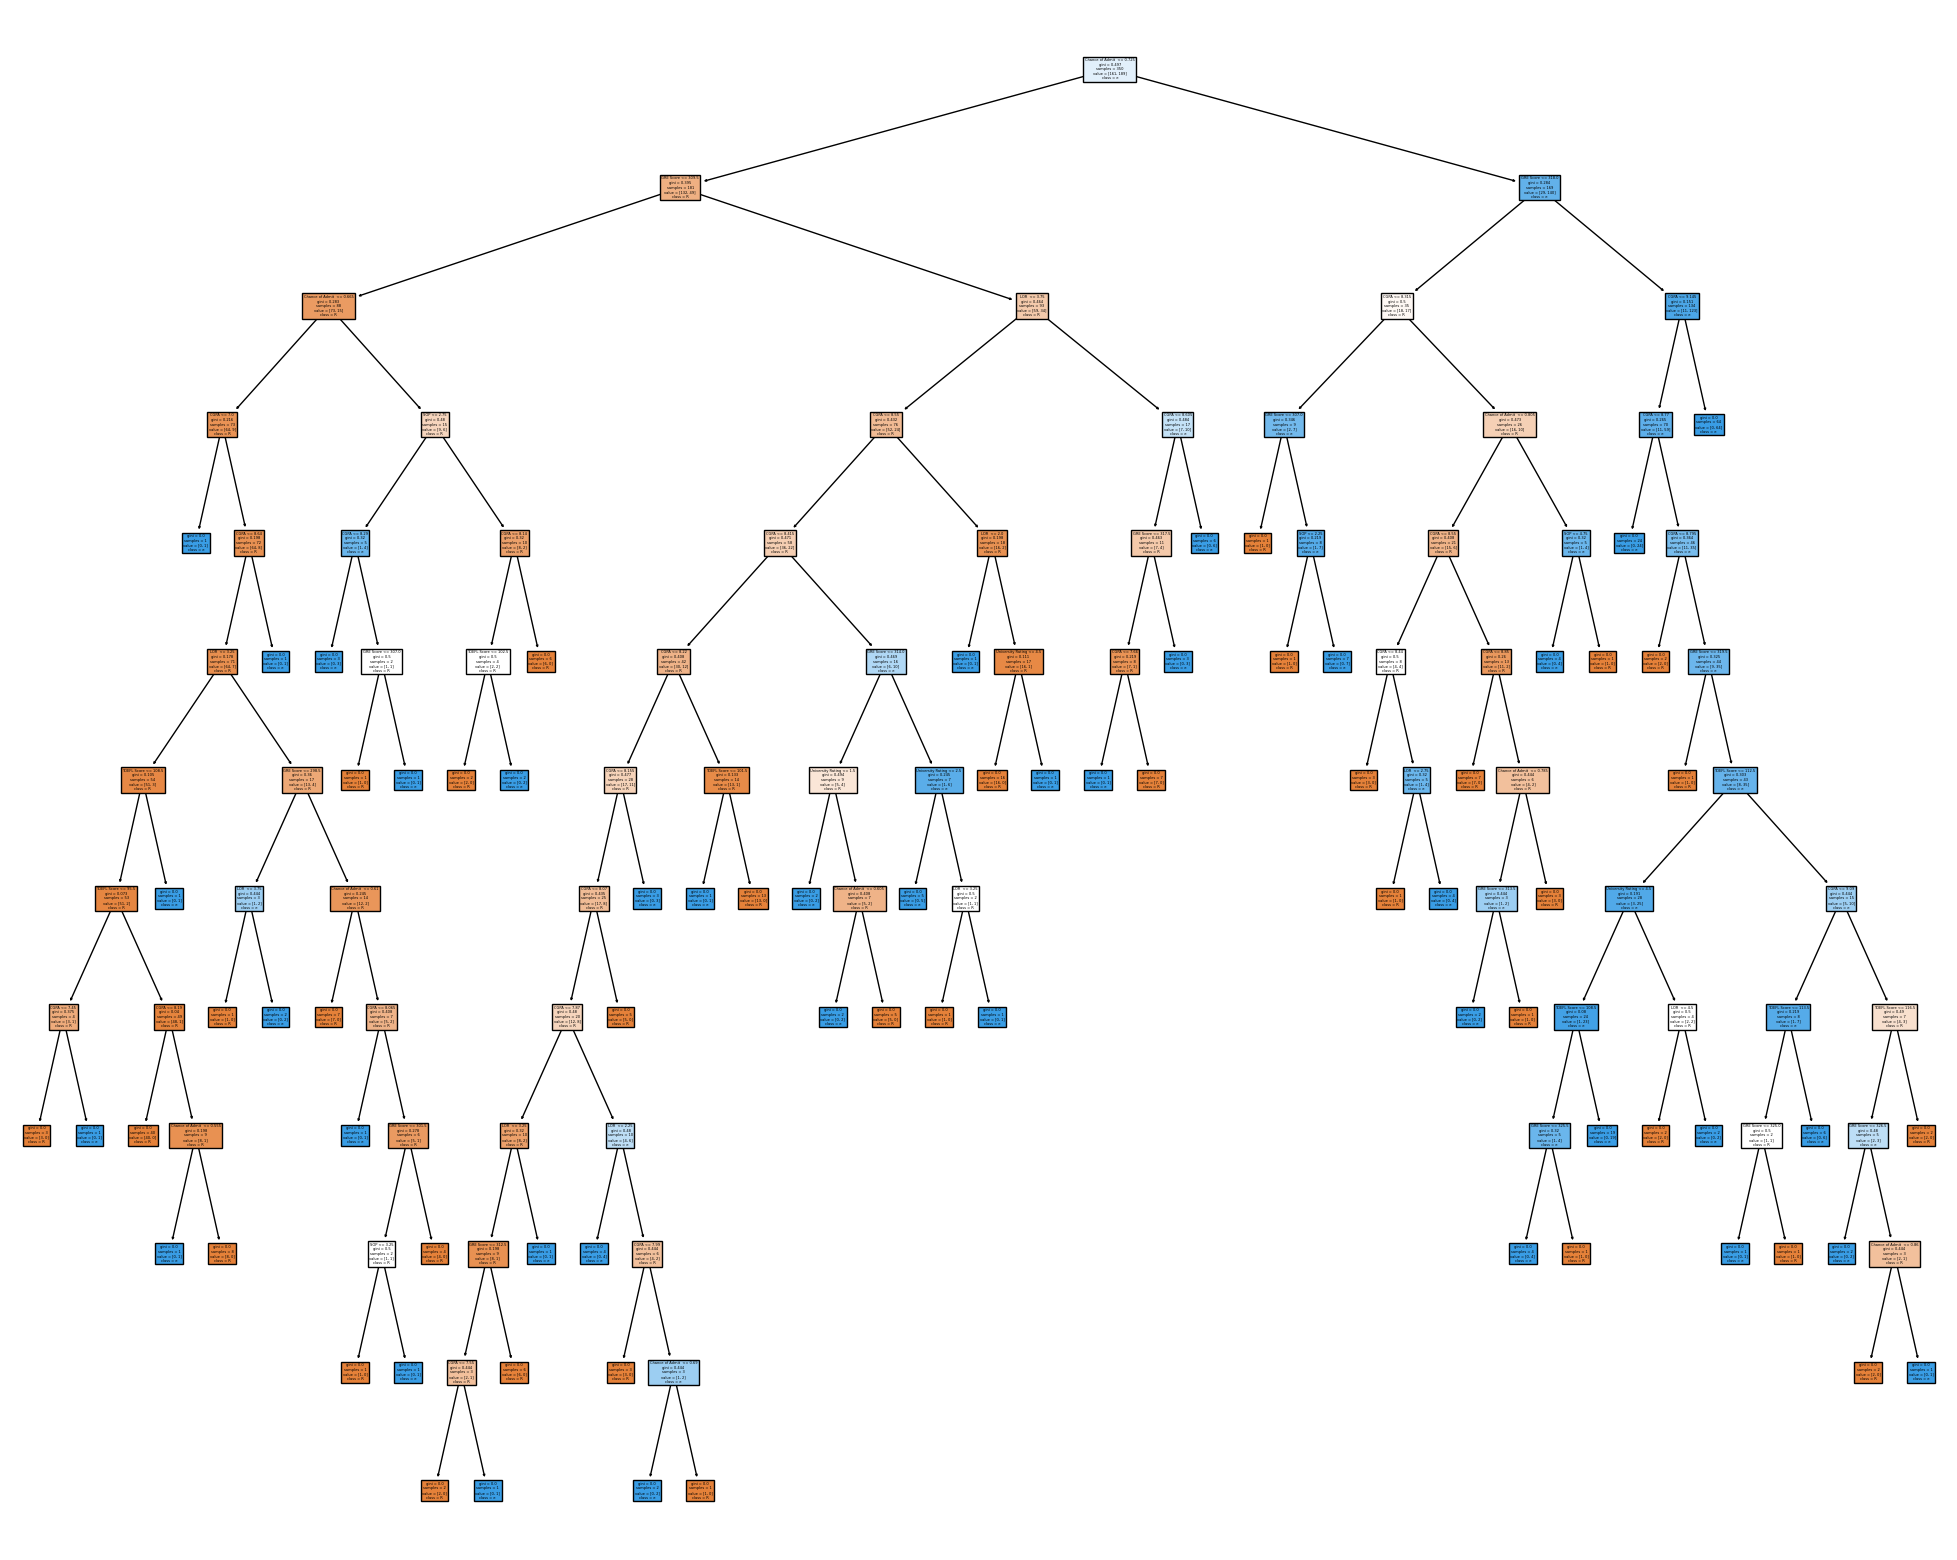

In [48]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Chance of Admit '],
                   class_names = "Research",
                   filled=True)

In [49]:
model = pd.DataFrame({
    'Model': ['Support Vector Machines','KNN','Linear Regression','Logistic Regression','Decision Tree'],
    'Score': [acc_svm, acc_knn, acc_lir, acc_lr, acc_decisionTree ]
                     }
                    )
model.sort_values(by='Score', ascending=False)

,Model,Score
4,Decision Tree,100.00
1,KNN,81.33
0,Support Vector Machines,79.33
3,Logistic Regression,72.67
2,Linear Regression,30.18


### Decision Tree Accuracy is highest so in this dataset we aaply Decission Tree Algorithm